In [23]:
# import json to read the credentials.json file
import json

# open the credentials.json file and load the data into a variable called credentials
with open(r'C:\Users\kater\anaconda3\MongoDB--Movies\Credentials.json') as f:
    credentials = json.load(f)
    mongo_connection_string=credentials['mongodb']

# print the connection string character length
print(f"My MongoDB connection string is {len(mongo_connection_string)} characters long.")

My MongoDB connection string is 69 characters long.


In [24]:
# pymongo is the package that allows us to connect to MongoDB
import pymongo
# MongoClient is the class that allows us to connect to MongoDB
from pymongo import MongoClient
# certifi is a package that contains a cacert.pem file that has valid certificates for AWS
import certifi

# connect to the MongoDB database server using the MongoClient class
client = MongoClient(mongo_connection_string)
db = client.moviedata

# use certifi to set the SSL certificate, which is required by MongoDB Atlas, and connect to the database, which is called moviedata
mongo_connection_string = credentials['mongodb']
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# name of the MongoDB database we want to access
database = client['moviedata']

# name of the MongoDB collections we want to access
allCollections = database.list_collection_names()

# print the collections in the database
print(f"This database has the collections {allCollections}")

This database has the collections ['metacritic', 'superhero']


In [25]:
# pandas is a package that allows us to work with data as dataframes
import pandas as pd
# re is a package that allows us to use regular expressions
import re

# create a query that will return all movies released in 2015
yearquery = {'release_date': re.compile(r'2015')}

# assign the superhero and metacritic collections to variables. The collections are filtered by the yearquery
superheroCollection = database['superhero'].find(yearquery)
metacriticCollection = database['metacritic'].find(yearquery)

# Create a dataframe from the superhero and metacritic collections
superheroDF = pd.DataFrame(superheroCollection)
metacriticDF = pd.DataFrame(metacriticCollection)

# print the number of rows and columns of the dataframes
#print(superheroDF.shape)
#print(metacriticDF.shape)

# merge the two dataframes on the release date column
mergedDF = pd.merge(superheroDF, metacriticDF,how='outer', on='release_date')
mergedDF.head()

,_id_x,id,title_x,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,...,cast,director,producer,company,_id_y,movie_id,title_y,description,score,thumbnail
0,6529a4aa25a901e01e92b004,369610.0,Jurassic World,124.0,6.9,628966.0,TV-14::(LV),5/29/2015,150000000.0,208806270.0,...,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,"Patrick Crowley, Frank Marshall, Christopher R...","Universal Pictures, Amblin Entertainment, Lege...",NaN,NaN,NaN,NaN,NaN,NaN
1,6529a4aa25a901e01e92b260,3375286.0,Bunny the Killer Thing,88.0,4.3,1600.0,None,5/29/2015,1000000.0,NaN,...,"Enni Ojutkangas, Jari Manninen, Orwi Manny Ame...",Joonas Makkonen,"Miika J. Norvanto, Matti Pekkanen, Mikko Soukkala","Black Lion Pictures, Jo-Jo the Dog Films, Bott...",NaN,NaN,NaN,NaN,NaN,NaN
2,6529a4aa25a901e01e92b3cf,3108604.0,American Poltergeist,78.0,2.0,2785.0,None,5/29/2015,NaN,NaN,...,"Donna Spangler, Simona Fusco, Luke Brandon Fie...",Michael Rutkowski,"Leila Alson, Stuart Alson, Richard Benveniste,...",", , , ,",NaN,NaN,NaN,NaN,NaN,NaN
3,6529a4aa25a901e01e92b487,4234740.0,Hayalet Dayi,98.0,4.7,1165.0,NaN,5/29/2015,1000000.0,NaN,...,"Settar Tanriögen, Ozan Özcan, Caner Özyurtlu, ...",Ali Yorgancioglu,"Omer Abra, Ali Yorgancioglu, Asli Yorgancioglu","DCC Film, Dirty Cheap Creative",NaN,NaN,NaN,NaN,NaN,NaN
4,6529a4aa25a901e01e92b508,4328798.0,Massu Engira Masilamani,151.0,5.9,4470.0,Not Rated,5/29/2015,200.0,NaN,...,"Suriya, Nayanthara, Parthiban Radhakrishnan, S...",Venkat Prabhu,"K.E. Gnanavelraja, Jithin Thorai","Aadnah Arts, Studio Green",NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# convert the release date column to a datetime object, and ignore any errors, such as missing values.
mergedDF.release_date = pd.to_datetime(mergedDF.release_date, errors='coerce')

# Convert the runtime and budget columns to numeric
mergedDF.runtime = pd.to_numeric(mergedDF['runtime'])
mergedDF.budget = pd.to_numeric(mergedDF['budget'])

# Convert the release date to day of year, so it can be plotted
mergedDF.release_date = pd.to_datetime(mergedDF['release_date']).dt.year

(0.0, 300.0)

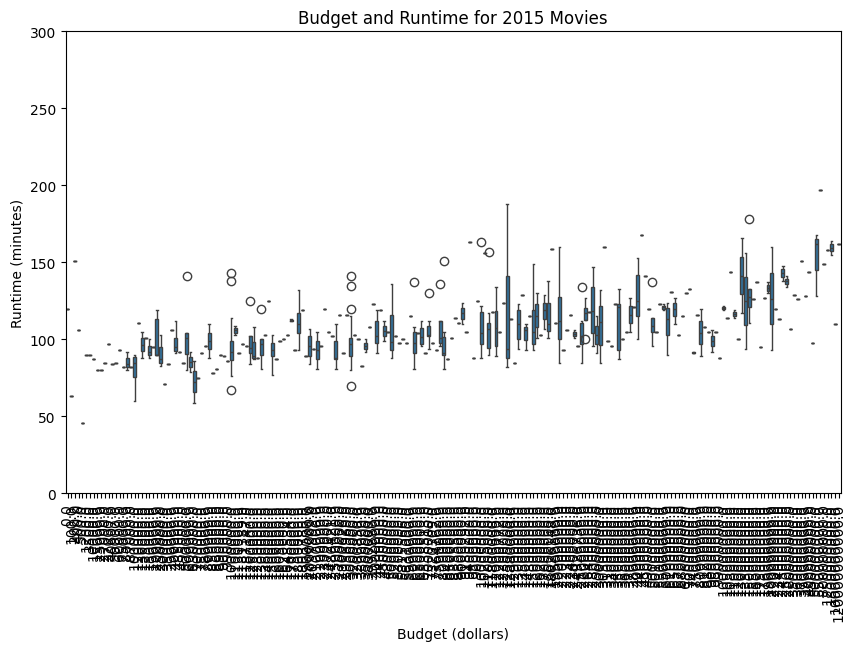

In [27]:
# import library to plot a boxplot for theruntime and budget plotted against the release date
# matplotlib is a package that allows us to plot data, and pyplot is a module within matplotlib that contains plotting functions
# seaborn is a package that allows us to plot data, and it is built on top of matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# set the plot size to 10 inches by 6 inches
plt.figure(figsize=(10,6))

# create boxplot, with the budget on the x axis, runtime on the y axis, and the data is the mergedDF dataframe, filtered by the release date of 2015
sns.boxplot(x='budget', y='runtime', data=mergedDF[mergedDF['release_date']==2015])

# set the title, y axis label, and x axis label
plt.title('Budget and Runtime for 2015 Movies')
plt.ylabel('Runtime (minutes)')
# scale the x axis to millions of dollars, and convert the x axis to a decimal (ex. 1000000 becomes 1.0)
plt.xlabel('Budget (dollars)')
# rotate the x axis labels 95 degrees
plt.xticks(rotation=90)

# set the y axis to start at 0, and end at 300
plt.ylim(0,300)

In [28]:
# use matplotlib to calculate the outliers for the runtime and budget, and assign them to variables
runtimeOutliers = mergedDF[mergedDF['release_date']==2015].runtime.quantile([.25, .75]).values
budgetOutliers = mergedDF[mergedDF['release_date']==2015].budget.quantile([.25, .75]).values

# calculate the interquartile range for runtime and budget
runtimeIQR = runtimeOutliers[1] - runtimeOutliers[0]
budgetIQR = budgetOutliers[1] - budgetOutliers[0]

# calculate the upper and lower bounds for runtime and budget
runtimeLowerBound = runtimeOutliers[0] - (1.5 * runtimeIQR)
runtimeUpperBound = runtimeOutliers[1] + (1.5 * runtimeIQR)
budgetLowerBound = budgetOutliers[0] - (1.5 * budgetIQR)
budgetUpperBound = budgetOutliers[1] + (1.5 * budgetIQR)

# print the upper and lower bounds for runtime and budget
print(f"The upper and lower bounds for runtime are {runtimeLowerBound} and {runtimeUpperBound}")
print(f"The upper and lower bounds for budget are {budgetLowerBound} and {budgetUpperBound}")

# print the number of outliers for runtime and budget
print(f"The number of outliers for runtime is {len(mergedDF[(mergedDF['release_date']==2015) & ((mergedDF['runtime'] < runtimeLowerBound) | (mergedDF['runtime'] > runtimeUpperBound))])}")
print(f"The number of outliers for budget is {len(mergedDF[(mergedDF['release_date']==2015) & ((mergedDF['budget'] < budgetLowerBound) | (mergedDF['budget'] > budgetUpperBound))])}")

# merge title_x and title_y columns into one column called title
mergedDF['title'] = mergedDF['title_x'].combine_first(mergedDF['title_y'])

print(mergedDF.shape)
print(mergedDF.columns)

# assign the movie titles to a variable
title = mergedDF['title']

# print the outliers for runtime and budget by movie title, and output the values for columns title, runtime, and budget in descending  order
print("Here are the outliers for runtime:")
print(mergedDF[(mergedDF['release_date']==2015) & ((mergedDF['runtime'] < runtimeLowerBound) | (mergedDF['runtime'] > runtimeUpperBound))].sort_values(by=['runtime'], ascending=False)[['title', 'runtime', 'budget']])
print("Here are the outliers for budget:")
print(mergedDF[(mergedDF['release_date']==2015) & ((mergedDF['budget'] < budgetLowerBound) | (mergedDF['budget'] > budgetUpperBound))].sort_values(by=['budget'], ascending=False)[['title', 'runtime', 'budget']])

# show the plot
plt.show()

The upper and lower bounds for runtime are 52.5 and 152.5
The upper and lower bounds for budget are -34896498.75 and 62537899.25
The number of outliers for runtime is 55
The number of outliers for budget is 68
(1975, 23)
Index(['_id_x', 'id', 'title_x', 'runtime', 'user_rating', 'votes',
       'mpaa_rating', 'release_date', 'budget', 'opening_weekend',
       'gross_sales', 'genres', 'cast', 'director', 'producer', 'company',
       '_id_y', 'movie_id', 'title_y', 'description', 'score', 'thumbnail',
       'title'],
      dtype='object')
Here are the outliers for runtime:
                               title  runtime        budget
1012                      Happy Hour    317.0           NaN
1164                          Hamlet    217.0           NaN
90         MSG: The Messenger of God    197.0  5.500000e+08
209                            Human    190.0           NaN
612                                I    188.0  1.250000e+07
1226                       Papanasam    179.0           NaN

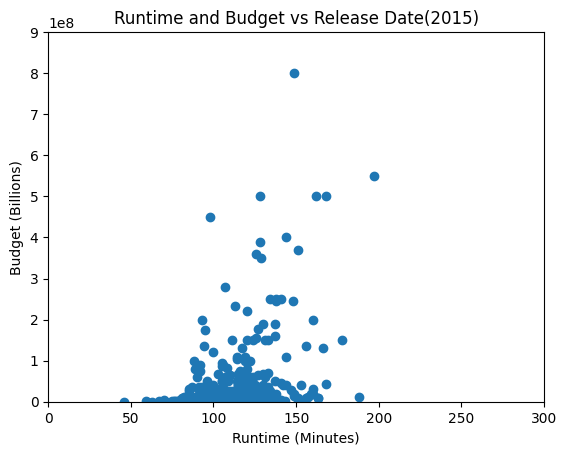

In [46]:
# Create a chart showing Runtime and Budget plotted against release date.
import matplotlib.pyplot as plt

# create a figure and axis
fig, ax = plt.subplots()
# create a scatter plot of budget vs runtime for movies released in 2015
ax.scatter(mergedDF[mergedDF['release_date']==2015]['runtime'], mergedDF[mergedDF['release_date']==2015]['budget'])



# scale the ranges of the axes
ax.set_xlim(0, 300)
ax.set_ylim(0, 900000000)

# set a title and labels
ax.set_title('Runtime and Budget vs Release Date(2015)')
ax.set_xlabel('Runtime (Minutes)')
ax.set_ylabel('Budget (Billions)')

# show the plot
plt.show()

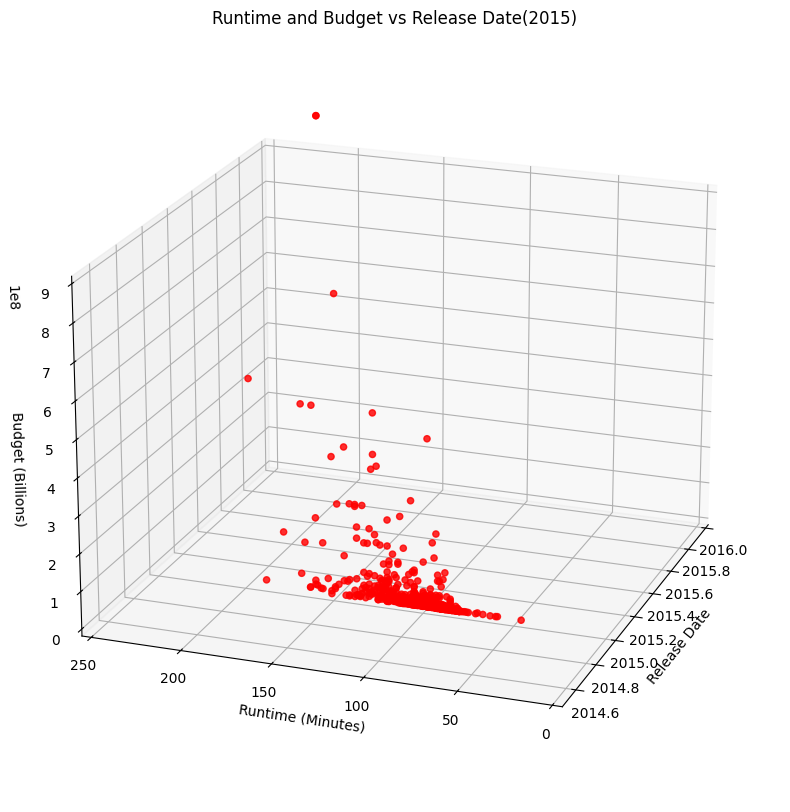

In [48]:
# Create a 3d chart showing Runtime and Budget plotted against release date.
from mpl_toolkits.mplot3d import Axes3D
import numpy as np  

# create a figure and axis, make fig size fully visible 
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# set the ranges of the x, y, and z axis
plt.axis([2014.5, 2016, 0, 250, 0, 900000000])

# create variables for the x, y, and z axis, which are release date, runtime, and budget
x = mergedDF.release_date
y = mergedDF.runtime
z = mergedDF.budget

# create a scatter plot of budget vs runtime, and the release date is the year 2015
ax.scatter(x, y, z, c='r', marker='o')

# set the x, y, and z axis labels
ax.set_title('Runtime and Budget vs Release Date(2015)')
ax.set_xlabel('Release Date')
ax.set_ylabel('Runtime (Minutes)')
ax.set_zlabel('Budget (Billions)')

# rotate the 3d plot a different way
ax.view_init(20, 200)

plt.show()

The box plot method certainly makes it easier to visuals the outliers. Although it is difficult to assess the budget (ex.550000000.0 is $550 Million) 

Here are the top and bottom outliers for Runtime and Budget. The full list can be found in output shown above.

```
The top 5 outliers for Runtime are:
                               title  runtime        budget
979                       Happy Hour    317.0           NaN
1255                          Hamlet    217.0           NaN
430        MSG: The Messenger of God    197.0  5.500000e+08
499                            Human    190.0           NaN
902                                I    188.0  1.250000e+07

The bottom 4 outliers for Runtime are:
                               title  runtime        budget
1299         Jago: A Life Underwater     48.0           NaN
941         Mushi-Shi: Bell Droplets     47.0           NaN
152                       King Candy     46.0  5.000000e+02
909        Daughters of Mother India     45.0           NaN

The top 5 outliers for budget are:
                               title  runtime        budget
1037  Muhammad: The Messenger of God    162.0  1.200000e+11
1150                Coin Locker Girl    110.0  1.000000e+10
1118                            Puli    155.0  1.800000e+09
479             Prem Ratan Dhan Payo    164.0  1.800000e+09
64                   Bajirao Mastani    158.0  1.250000e+09

The bottom 5 outliers for budget are:
                               title  runtime        budget
715                            Ted 2    115.0  6.800000e+07
719                       Goosebumps    103.0  6.700000e+07
788              Victor Frankenstein    110.0  6.500000e+07
161                              Spy    120.0  6.500000e+07
154                     Dragon Blade    127.0  6.500000e+07
```


There is many reasons as to why these movies are outside the brackets of a normal proportioned runtime and budget. 
Some of them are:
1. For a runtime of 45-48 mins, there could be short films included in the dataset.
2. For budget outliers, the currencies could be mixed up, and the code here dosen't have a currency formatter to catch them. 
3. The movie "Happy Hour" (being the biggest top runtime outlier) has a runtime of "317 minutes". After some quick research, this is indeed a movie and not a short series. 
Perhaps sometimes, there are unsual cases of movies being 5 and 1/2 hours long. Deciding to use this movie in my report would require more questions about the purpose of the study. 
What are we trying to answer? or compare against each other? If i wanted to research a question about the proportion of movies in the population, then its possible these outliers 
would be useful in my study. 